In [1]:
#import the Libraries

import os
import pandas as pd
import numpy as np
import scipy as sp
import random
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.listdir('../../data/trends-assessment-prediction/')

['fMRI_test',
 'reveal_ID_site2.csv',
 'train_scores.csv',
 'fMRI_mask.nii',
 'ICN_numbers.csv',
 'fnc.csv',
 'sample_submission.csv',
 'fMRI_train',
 'loading.csv']

In [3]:
features = pd.read_csv('../../data/trends-assessment-prediction/train_scores.csv')
loading = pd.read_csv('../../data/trends-assessment-prediction/loading.csv')
submission = pd.read_csv('../../data/trends-assessment-prediction/sample_submission.csv')
fnc = pd.read_csv("../../data/trends-assessment-prediction/fnc.csv")
reveal = pd.read_csv('../../data/trends-assessment-prediction/reveal_ID_site2.csv')
numbers = pd.read_csv('../../data/trends-assessment-prediction/ICN_numbers.csv')
fmri_mask = '../../data/trends-assessment-prediction/fMRI_mask.nii'

In [4]:
# Installing the nilearn
#!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

### Importing Libraries for Brain image visualization.

In [5]:
import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import surface

In [6]:
smri = 'ch2better.nii'
mask_img = nl.image.load_img(fmri_mask)

def load_subject(filename, mask_img):
    subject_data = None
    with h5py.File(filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_img = nl.image.new_img_like(mask_img, subject_data, affine=mask_img.affine, copy_header=True)

    return subject_img

### Taking any 3 random images and visualize the plot.

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------


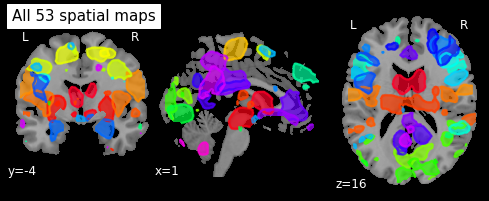

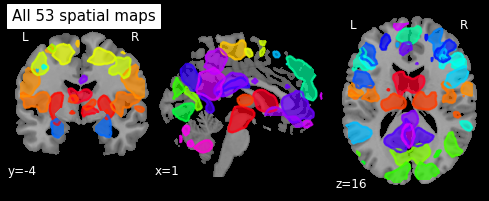

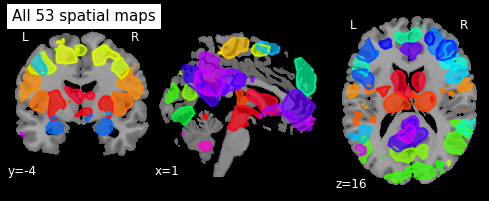

In [7]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    nlplt.plot_prob_atlas(subject_img, bg_img=smri, view_type='filled_contours',
                          draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')
    print("-"*50)

## Plotting a statistical map...

Statistical parametric mapping or SPM is a statistical technique for examining differences in brain activity recorded during functional neuroimaging experiments.The measurement technique depends on the imaging technology (e.g., fMRI and PET). The scanner produces a 'map' of the area that is represented as voxels. Each voxel represents the activity of a specific volume in three-dimensional space. The exact size of a voxel varies depending on the technology. fMRI voxels typically represent a volume of 27 mm3 (a cube with 3mm length sides).

Parametric statistical models are assumed at each voxel, using the general linear model to describe the data variability in terms of experimental and confounding effects, with residual variability. Hypotheses expressed in terms of the model parameters are assessed at each voxel with univariate statistics.

Analyses may examine differences over time (i.e. correlations between a task variable and brain activity in a certain area) using linear convolution models of how the measured signal is caused by underlying changes in neural activity.

Because many statistical tests are conducted, adjustments have to be made to control for type I errors (false positives) potentially caused by the comparison of levels of activity over many voxels. A type I error would result in falsely assessing background brain activity as related to the task. Adjustments are made based on the number of resels in the image and the theory of continuous random fields in order to set a new criterion for statistical significance that adjusts for the problem of multiple comparisons.

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


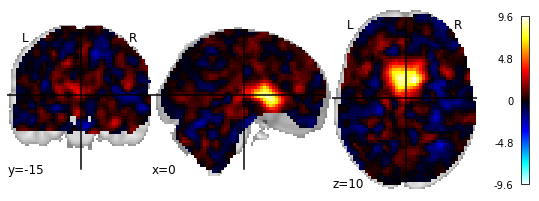

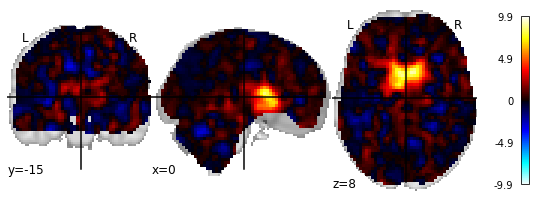

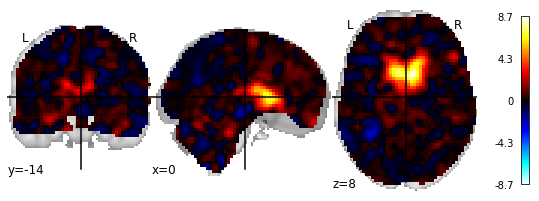

In [8]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_stat_map(first_rsn)
    print("-"*50)

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


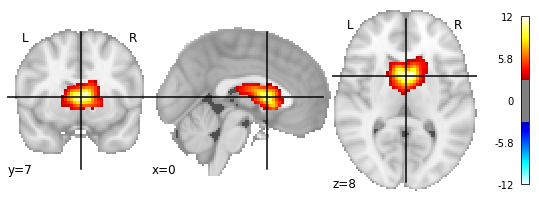

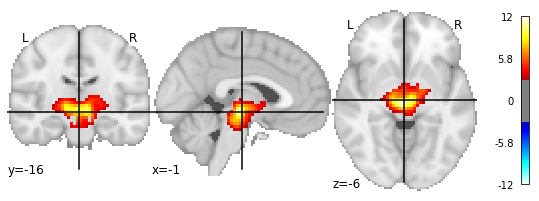

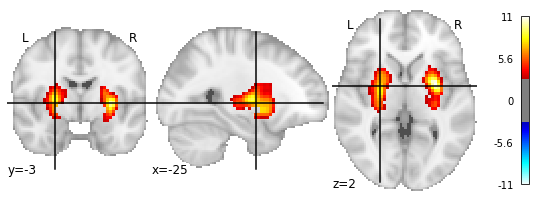

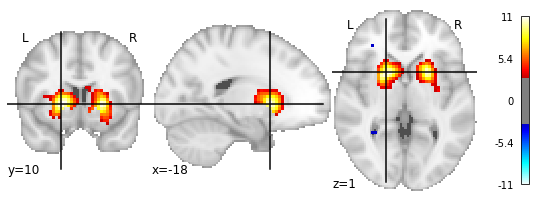

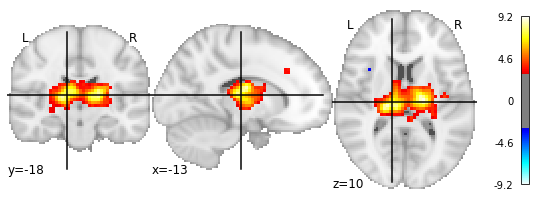

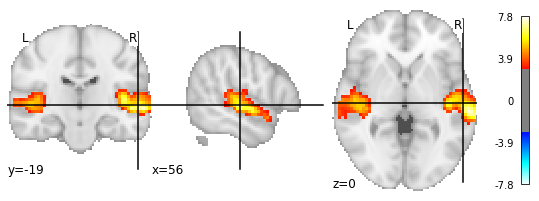

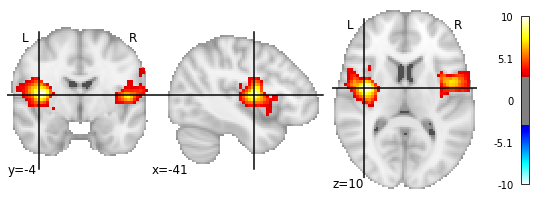

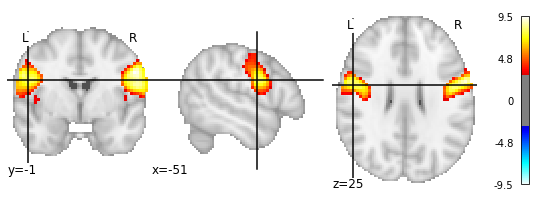

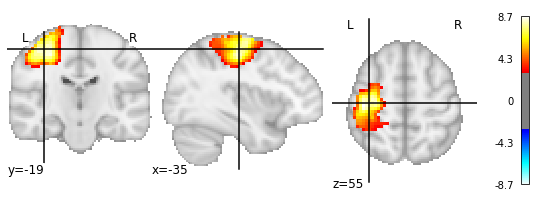

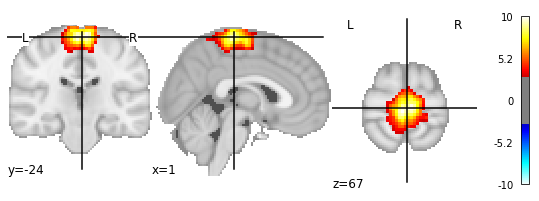

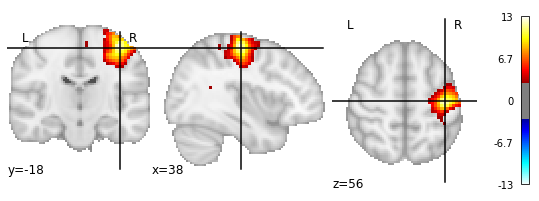

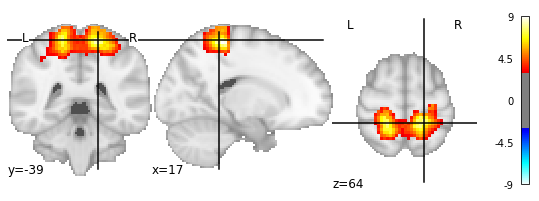

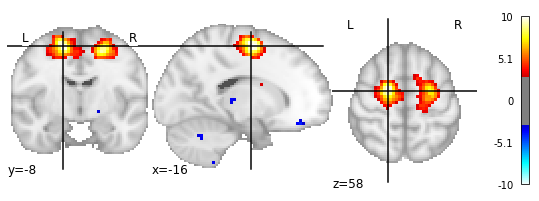

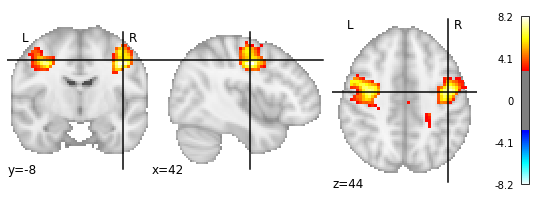

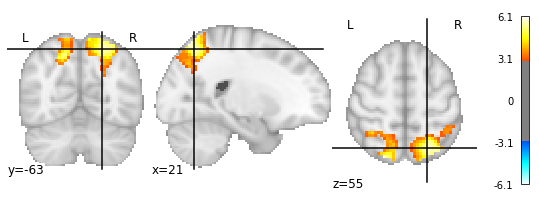

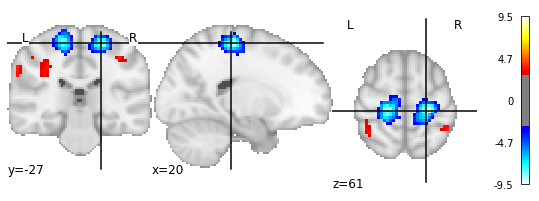

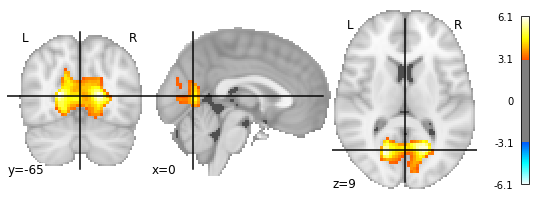

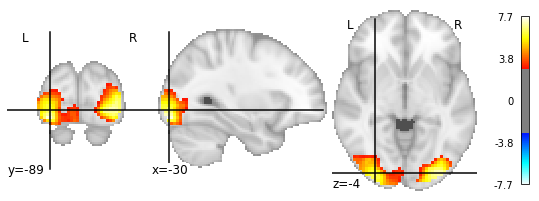

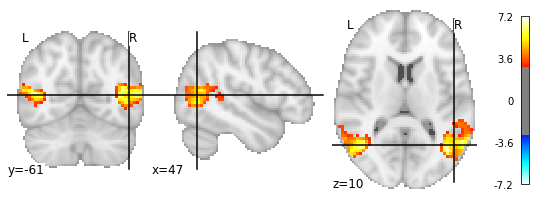

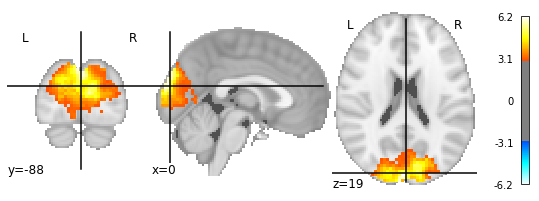

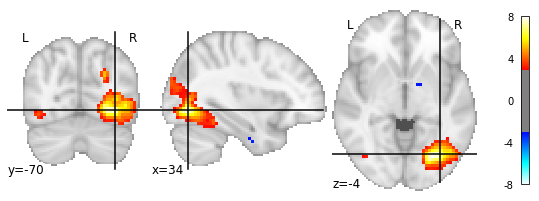

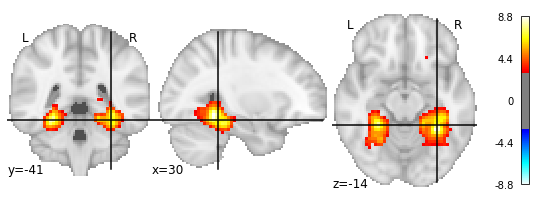

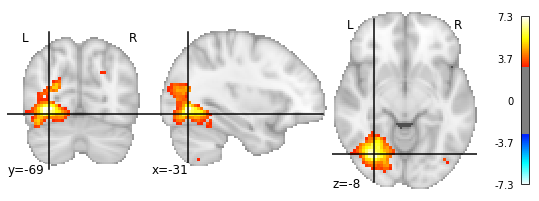

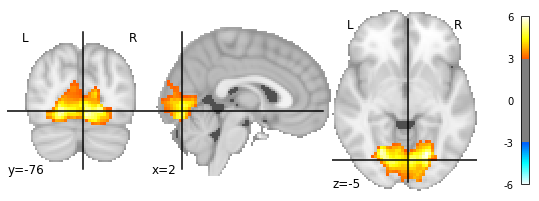

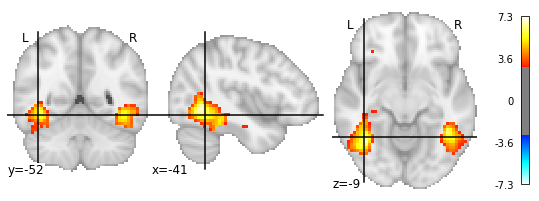

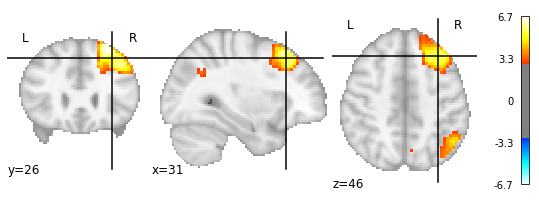

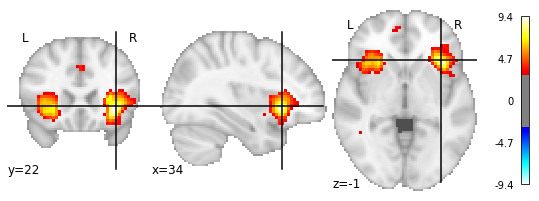

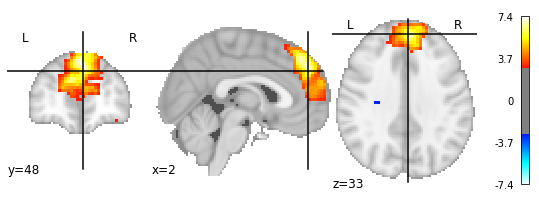

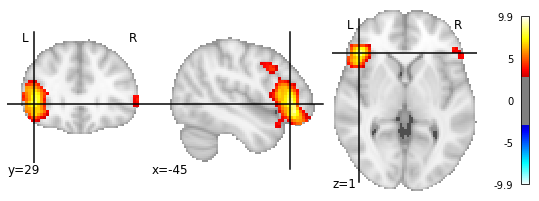

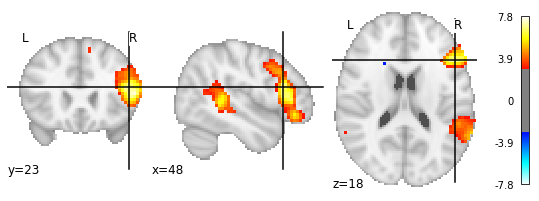

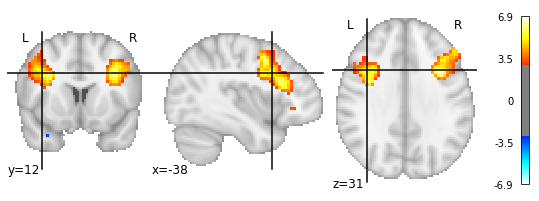

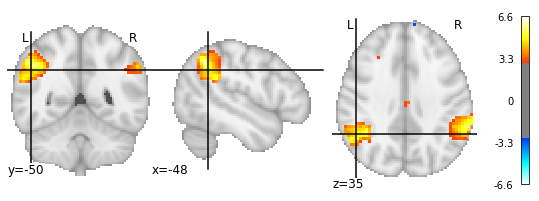

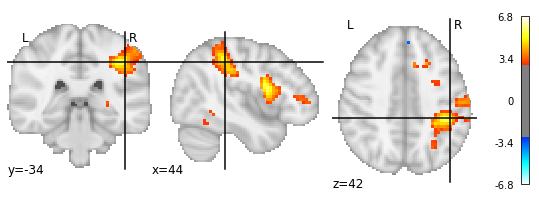

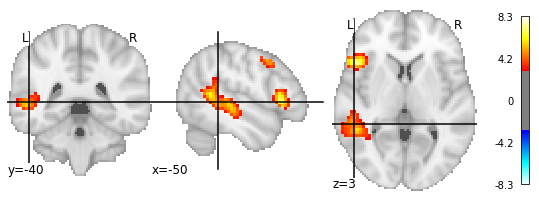

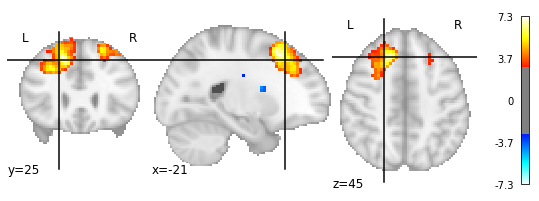

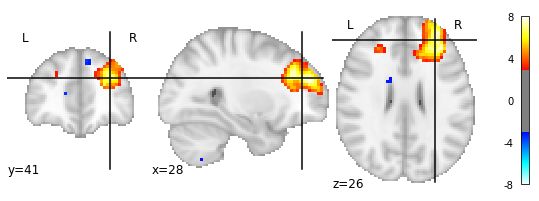

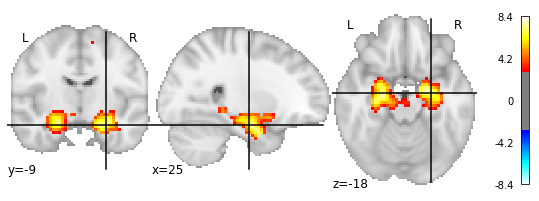

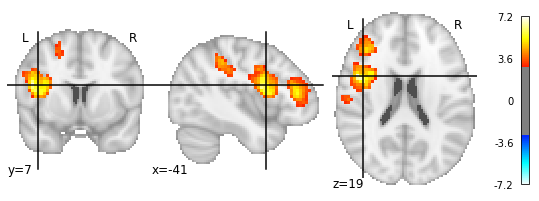

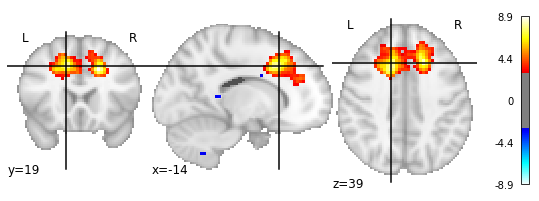

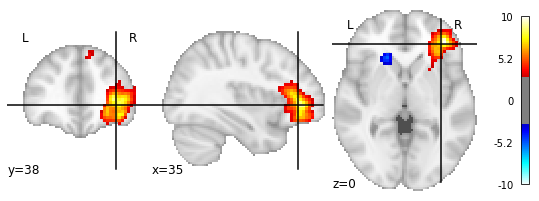

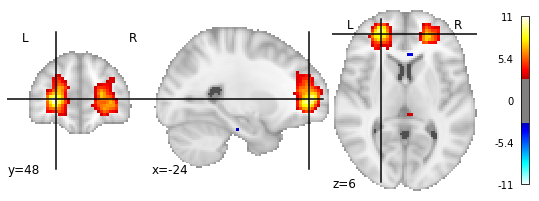

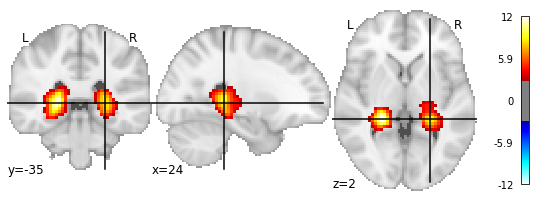

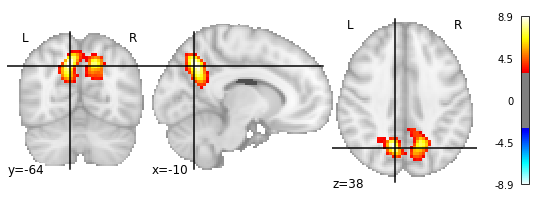

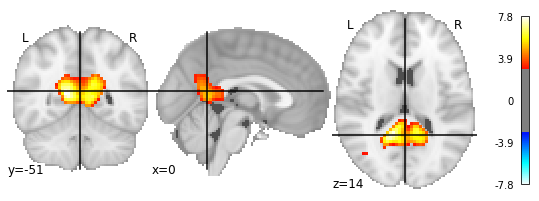

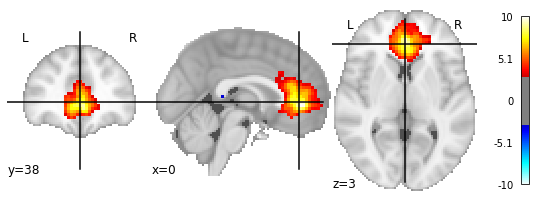

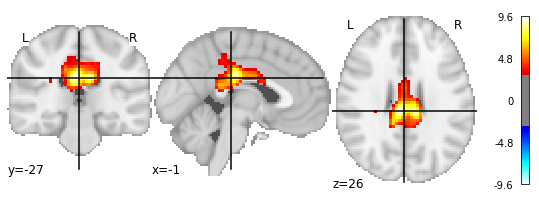

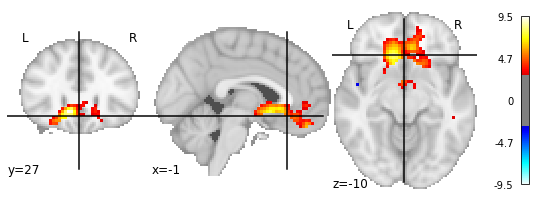

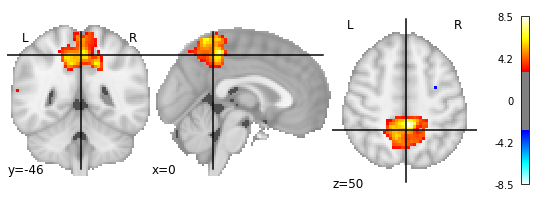

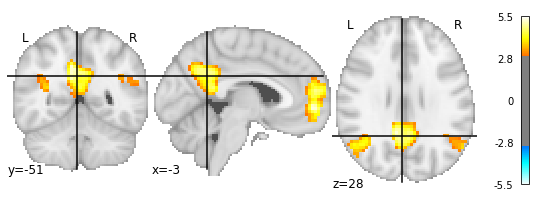

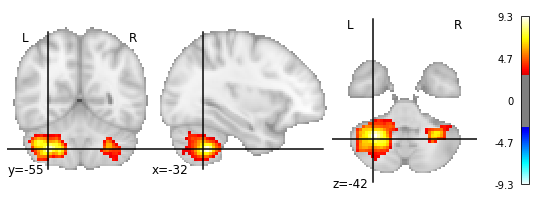

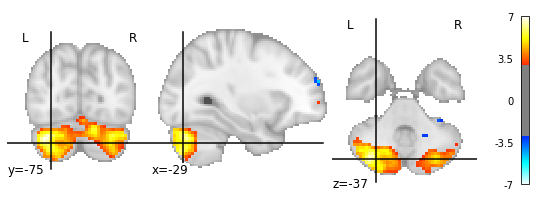

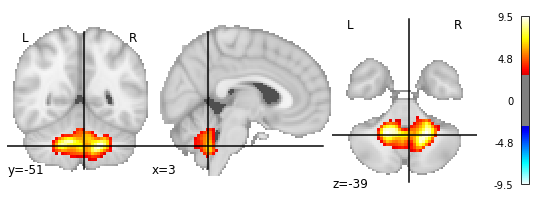

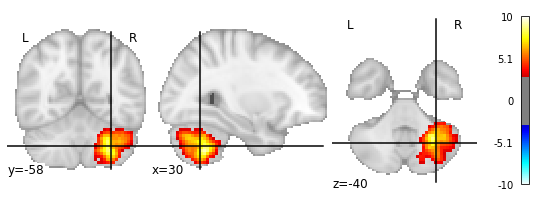

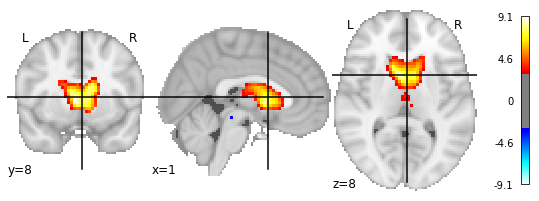

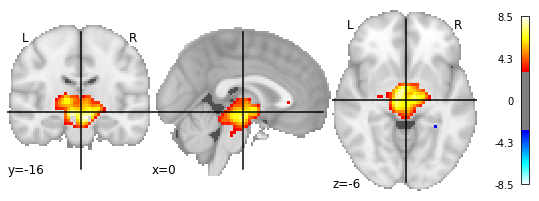

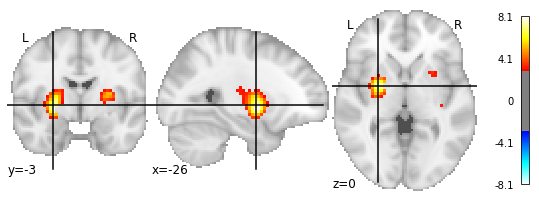

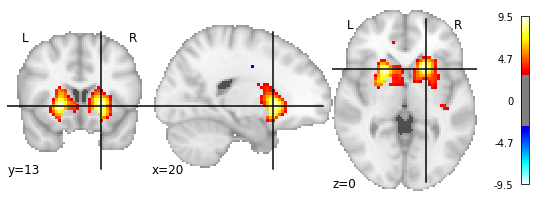

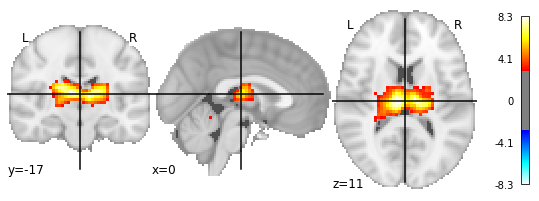

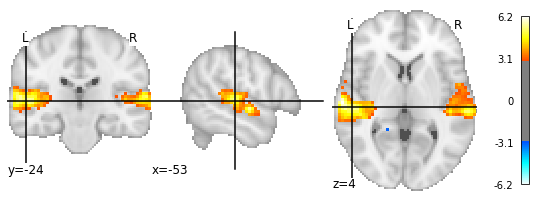

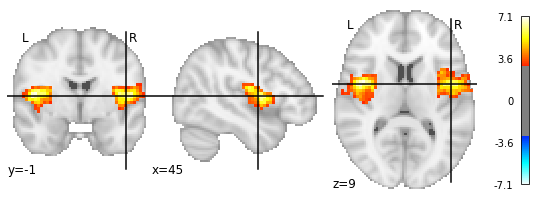

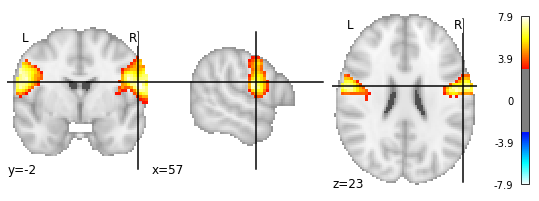

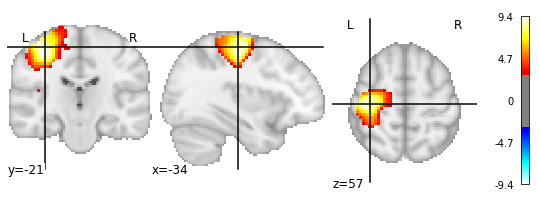

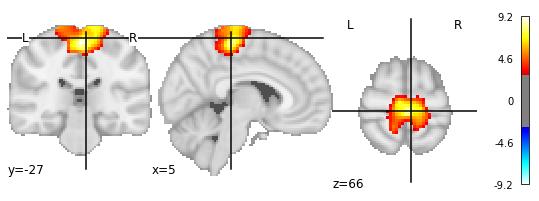

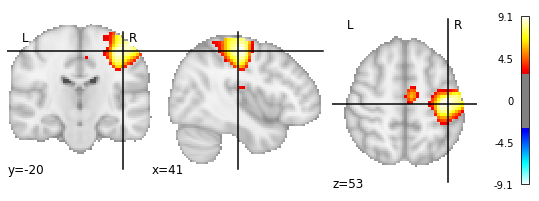

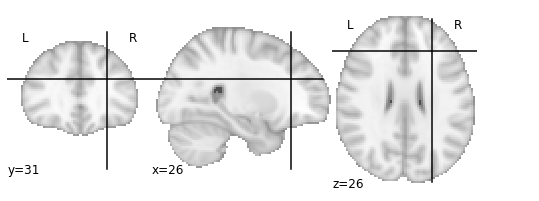

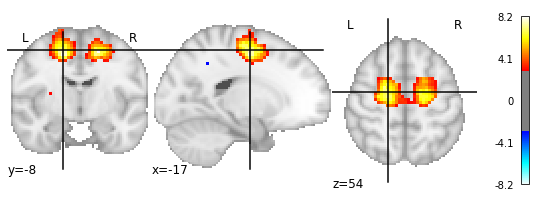

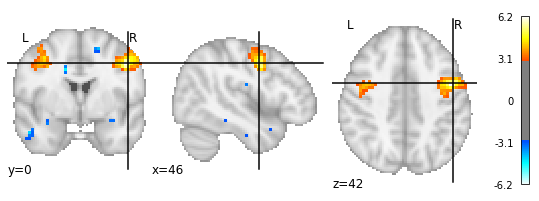

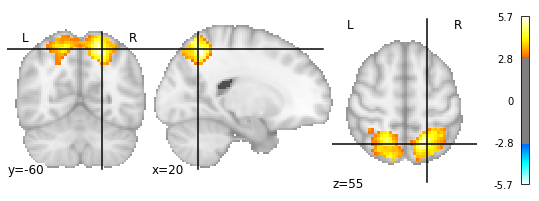

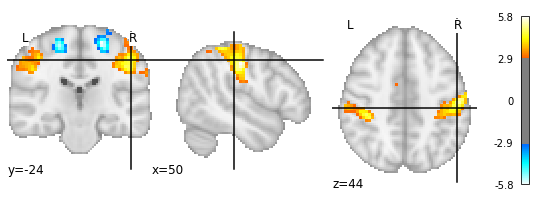

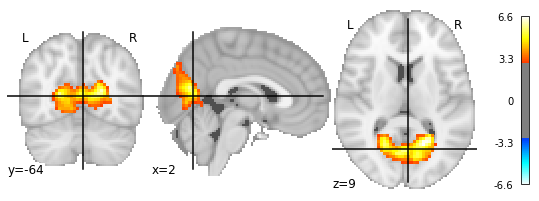

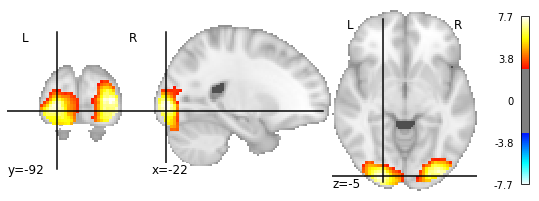

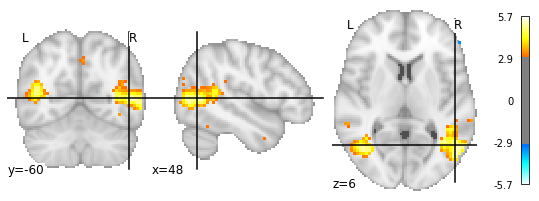

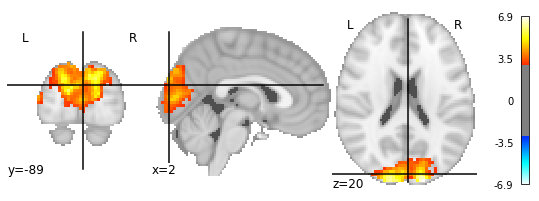

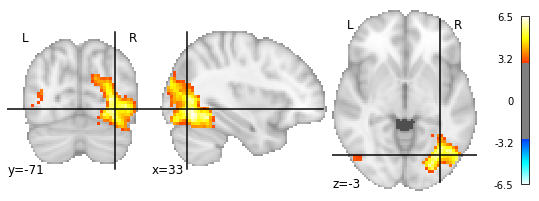

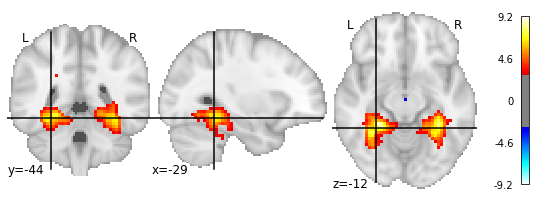

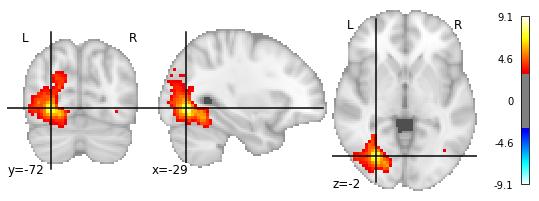

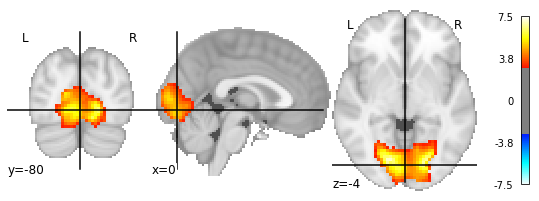

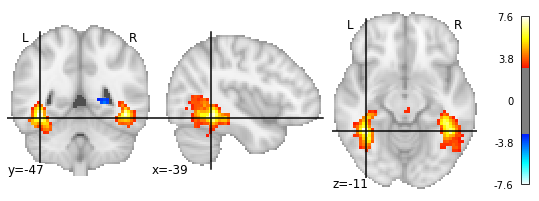

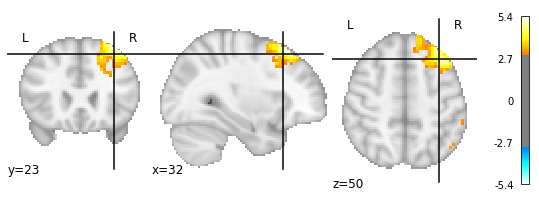

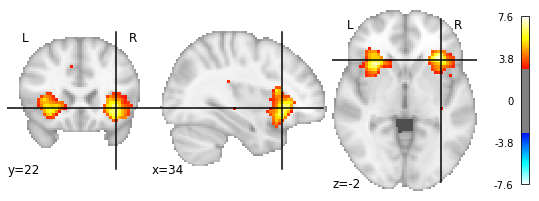

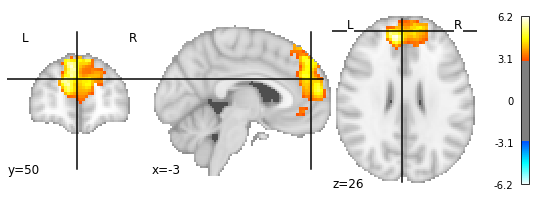

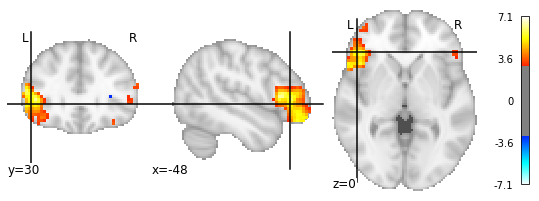

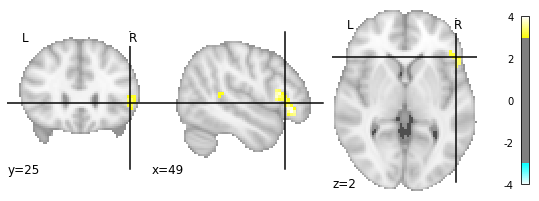

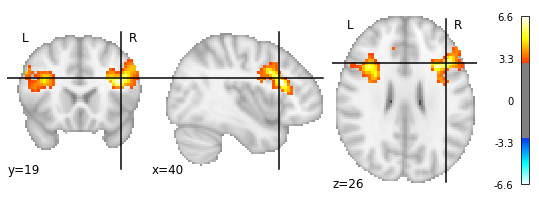

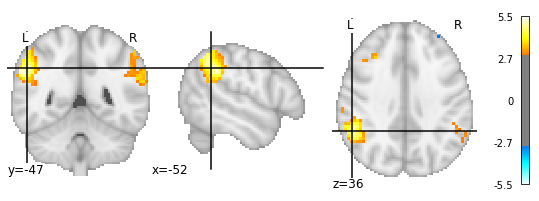

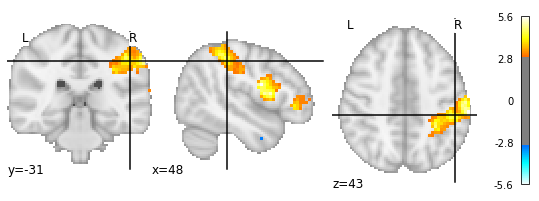

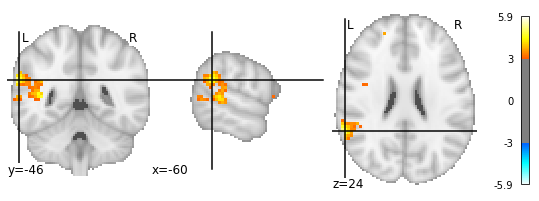

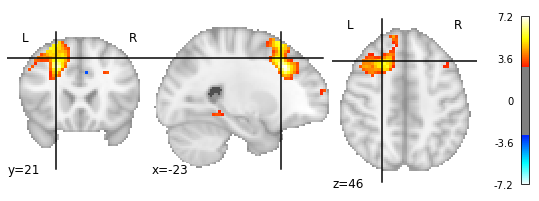

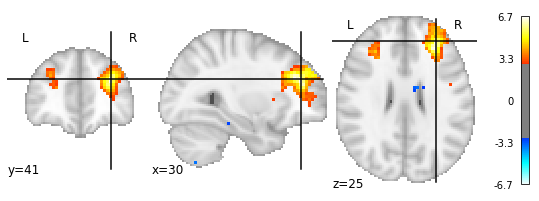

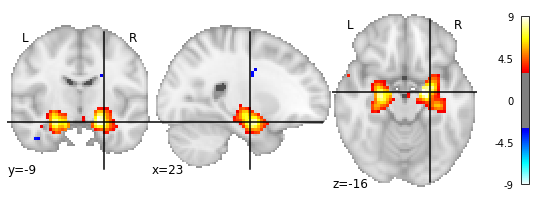

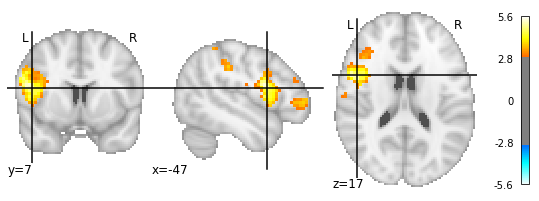

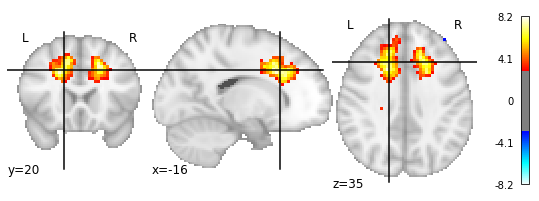

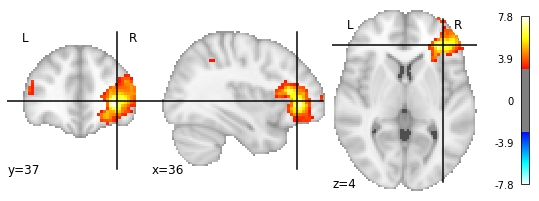

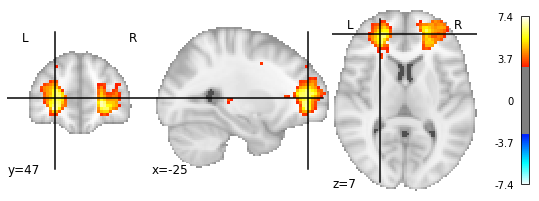

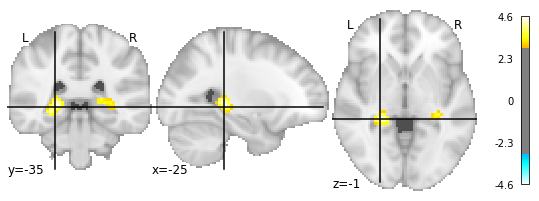

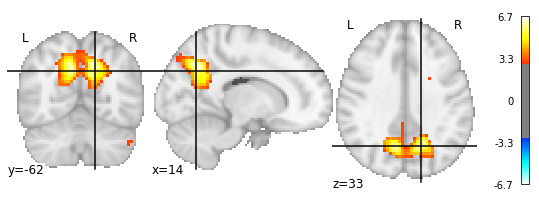

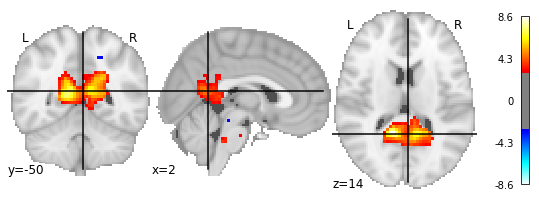

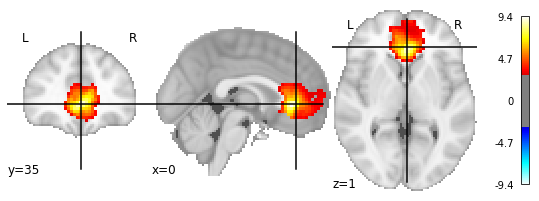

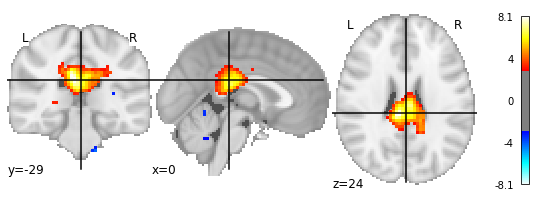

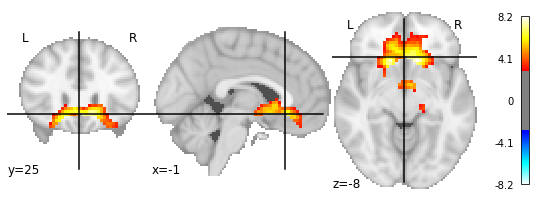

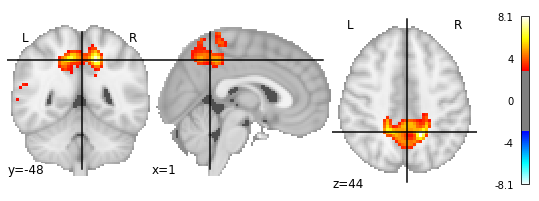

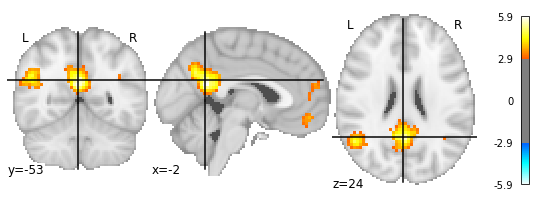

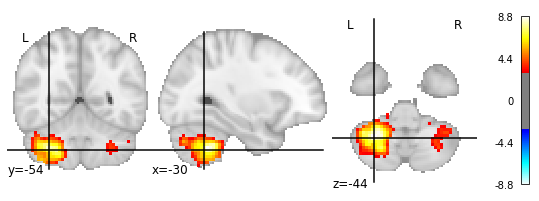

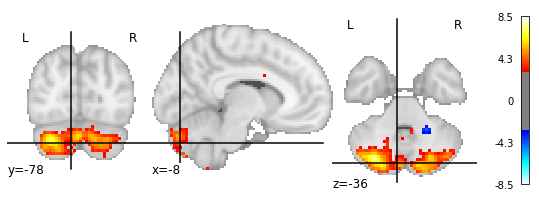

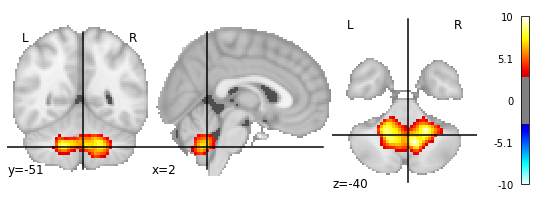

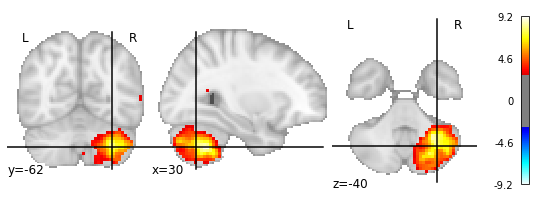

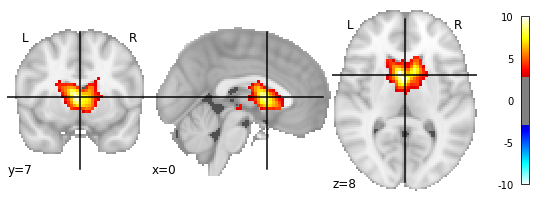

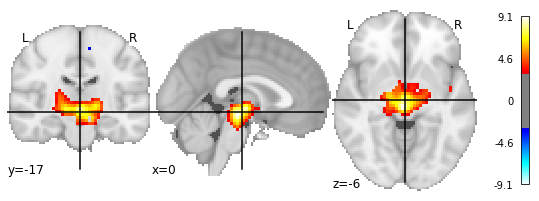

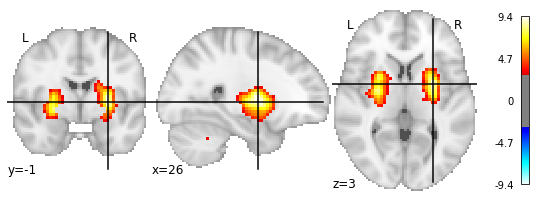

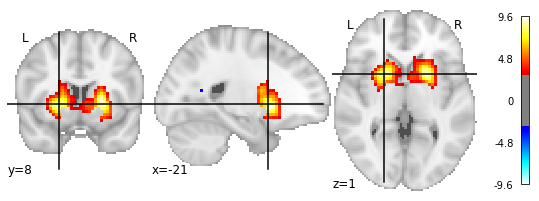

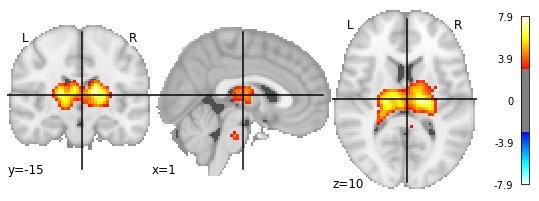

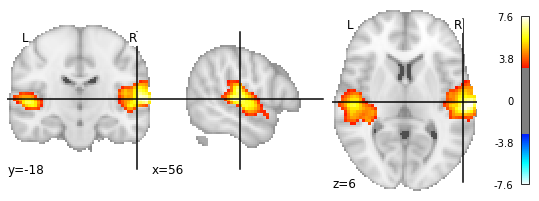

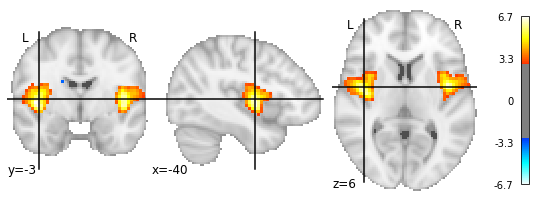

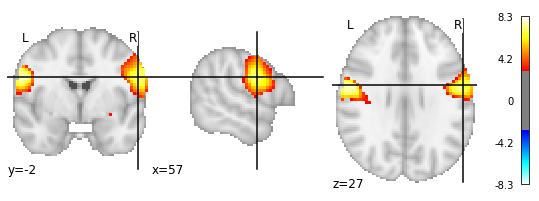

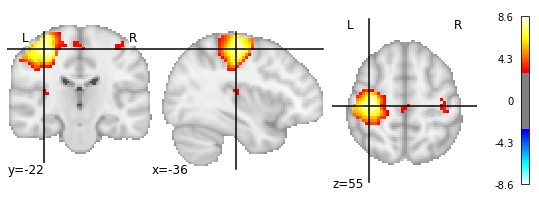

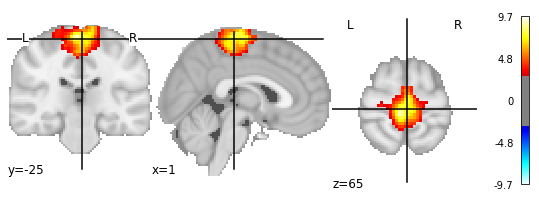

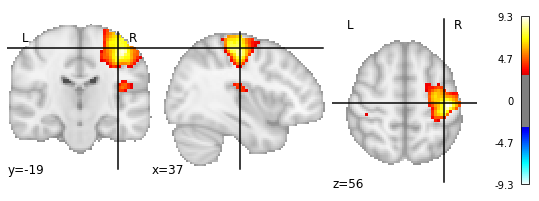

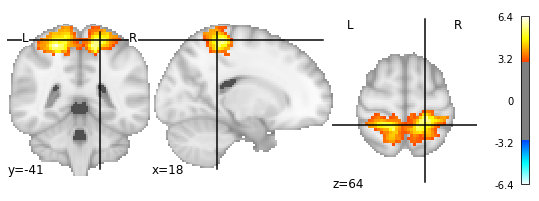

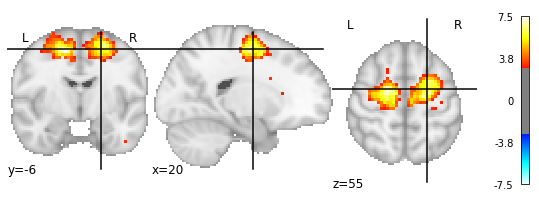

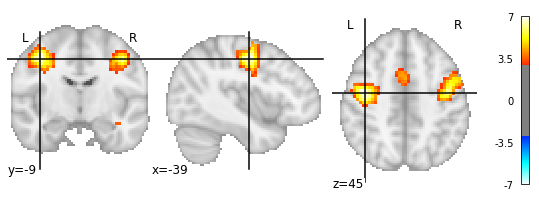

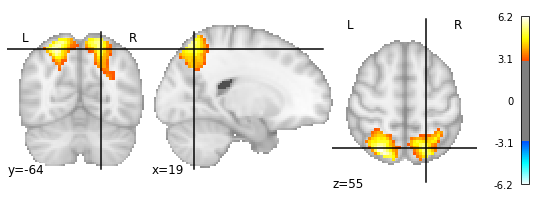

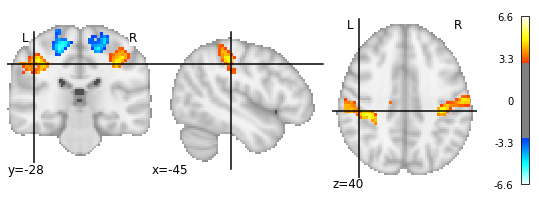

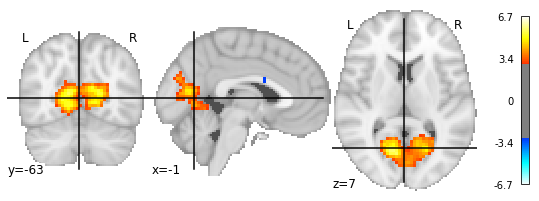

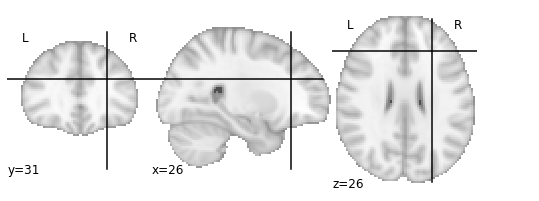

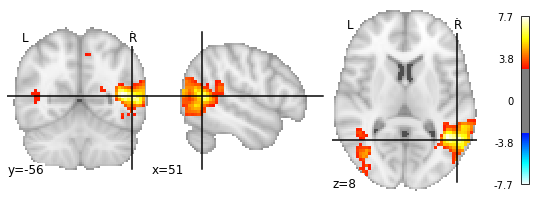

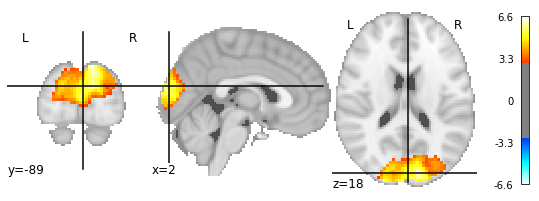

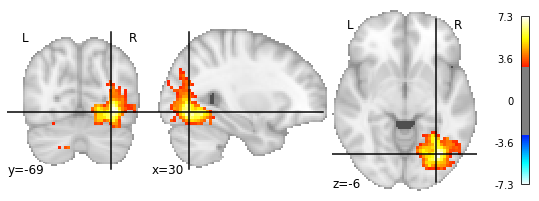

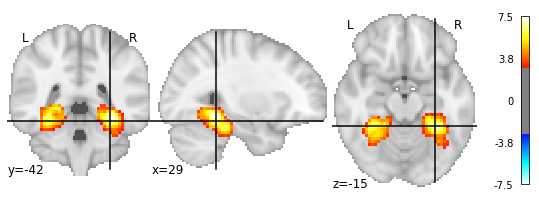

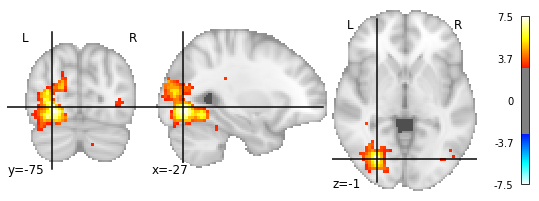

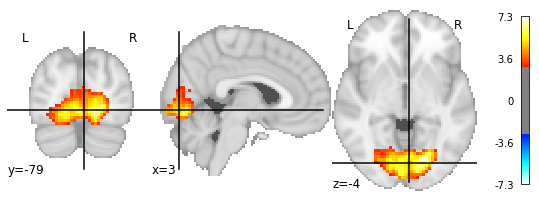

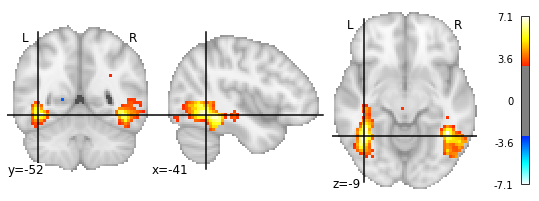

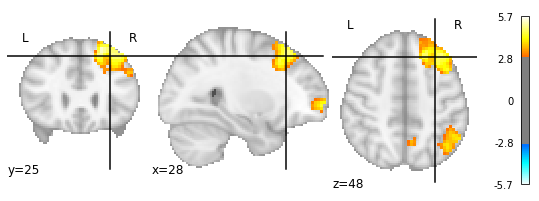

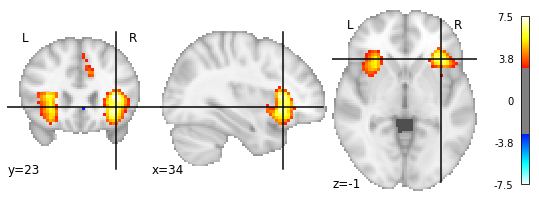

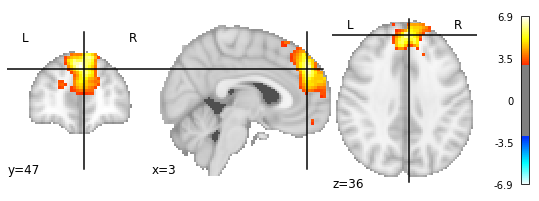

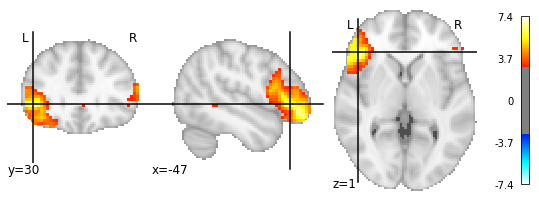

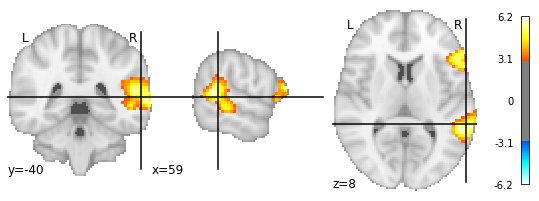

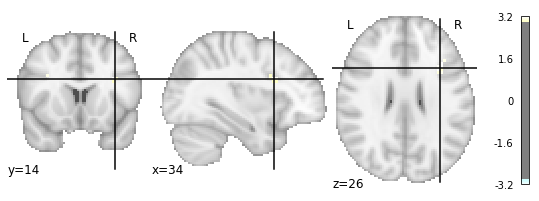

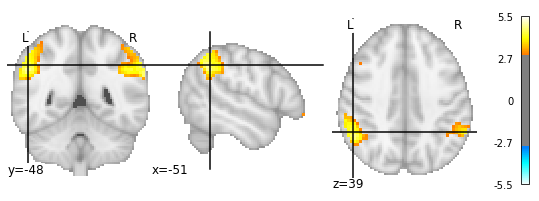

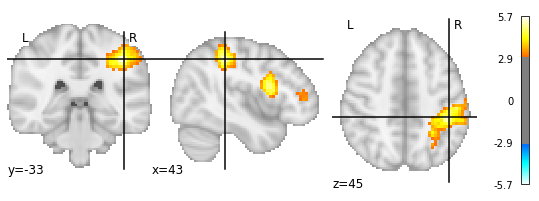

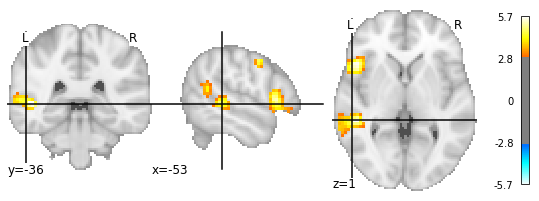

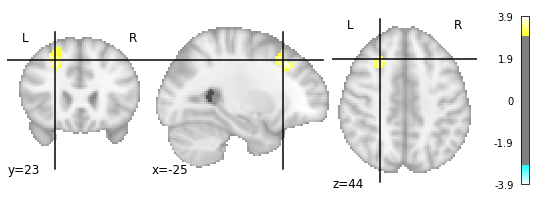

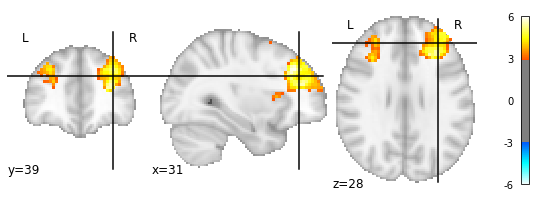

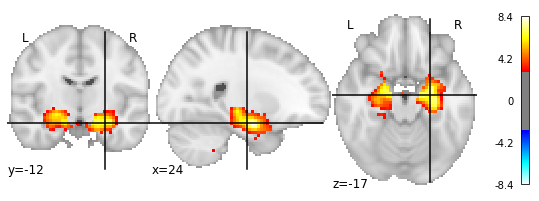

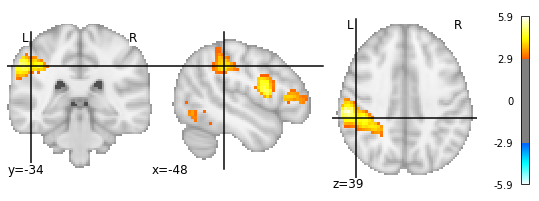

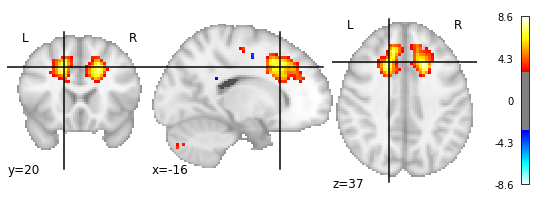

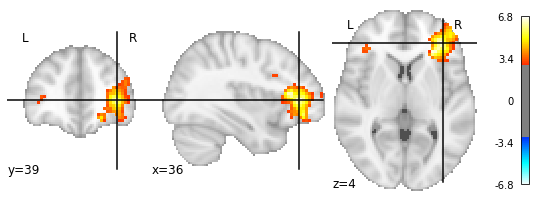

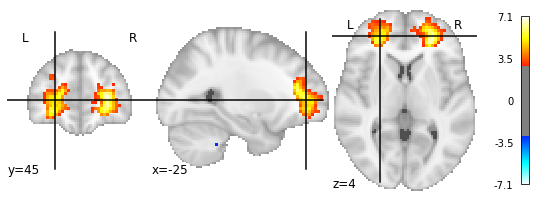

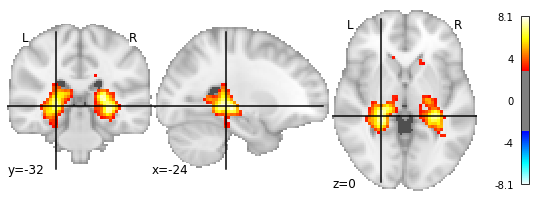

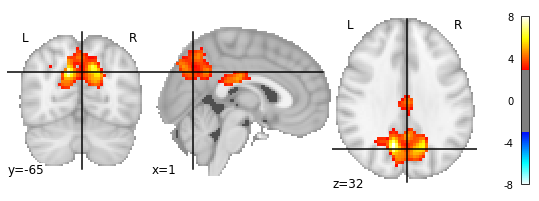

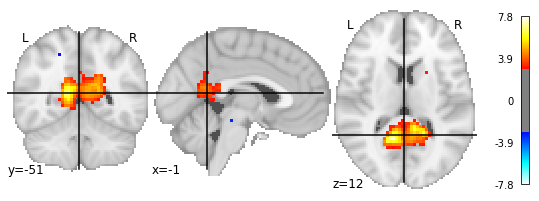

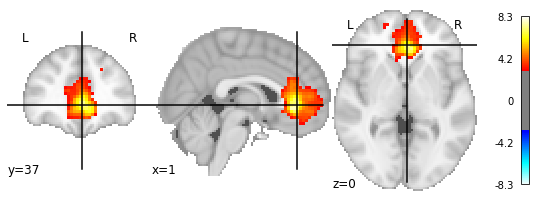

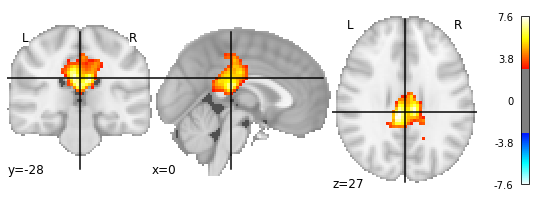

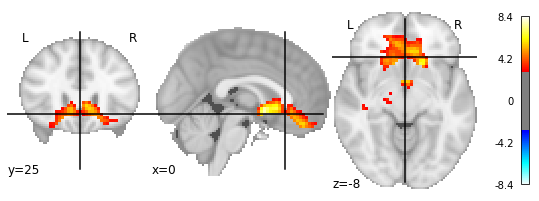

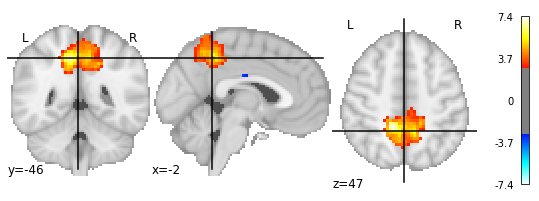

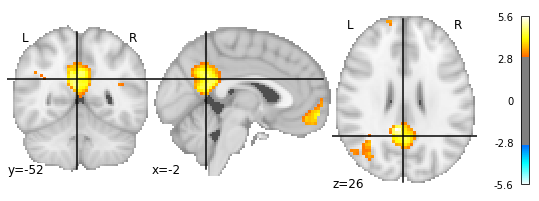

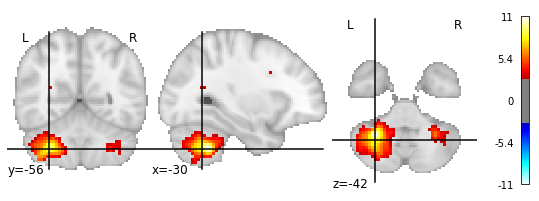

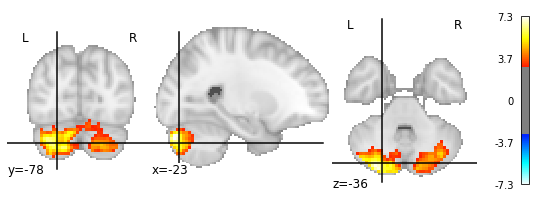

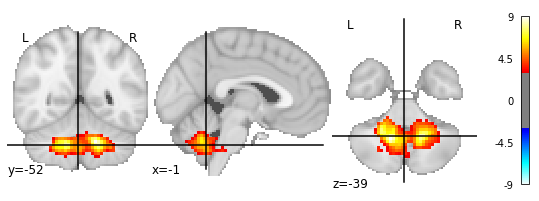

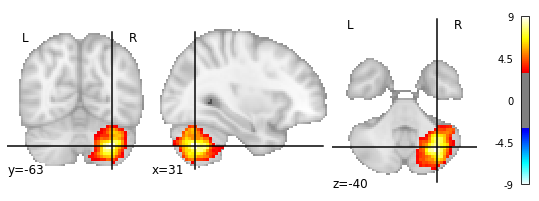

In [9]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    for img in image.iter_img(rsn):
        # img is now an in-memory 3D img
        plotting.plot_stat_map(img, threshold=3)
    print("-"*50)

## Glass brain visualization...

Glass Brain is a tool that maps the electrical activity of your brain in realtime.The anatomically realistic 3D brain will show realtime data from electroencephalographic (EEG) signals taken from a specially-designed EEG cap.This data is mapped to the source of that electrical activity, i.e. the specific part of the brain. The underlying brain model is generated through MRI scans so that the EEG data is accurately mapped to an individual's brain model.

Different colours are given to the different signal frequency bands to create a beautiful interactive artwork that seems to crackle with energy, showing how information is transferred (or at least estimated to do so) between different regions of the brain.

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


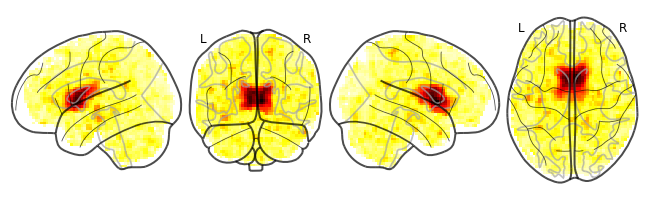

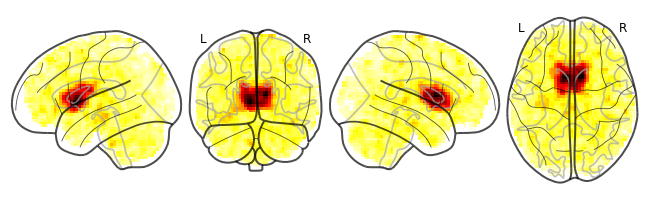

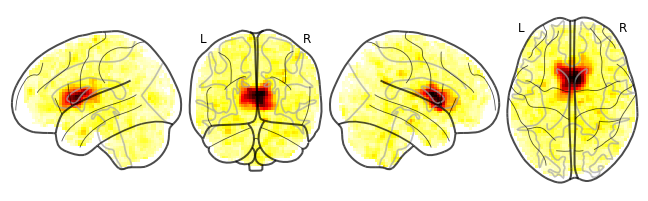

In [10]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)     
    plotting.plot_glass_brain(first_rsn,display_mode='lyrz')
    print("-"*50)

## Plotting an EPI...

In Echo-Planar Imaging (EPI)-based Magnetic Resonance Imaging (MRI), inter-subject registration typically uses the subject's T1-weighted (T1w) anatomical image to learn deformations of the subject's brain onto a template. The estimated deformation fields are then applied to the subject's EPI scans (functional or diffusion-weighted images) to warp the latter to a template space.

For further details you visit.[click here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5819565/)

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


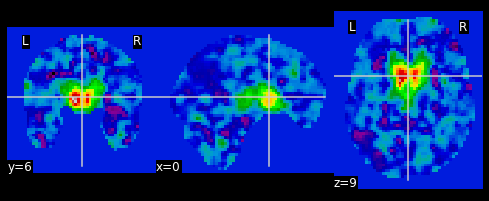

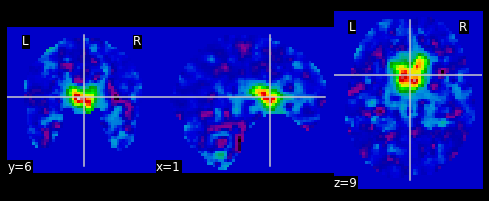

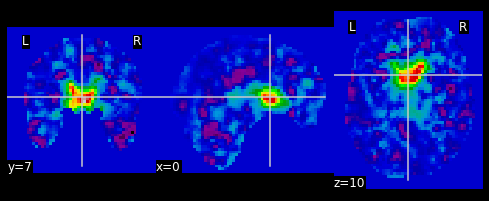

In [11]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_epi(first_rsn)
    print("-"*50)

## Plotting an anatomical image...

Main Idea of this visualization technique is to provide the anatomical picture of the brain. Due to the measurement procedures, BOLD images usually have a realtively low resolution, as you want to squeeze in as many data-points along time as possible.

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


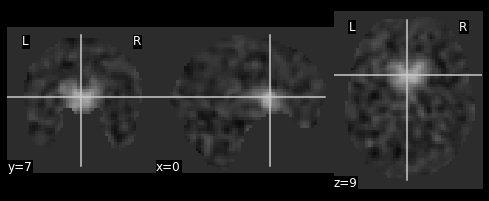

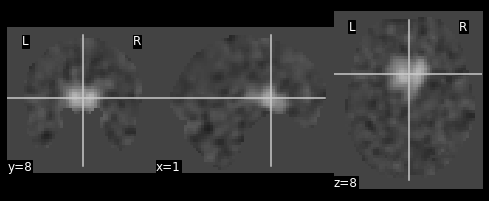

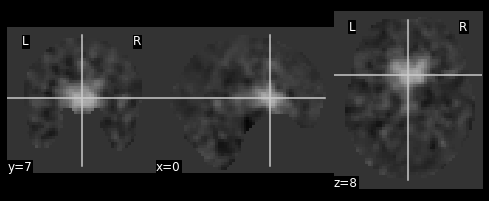

In [12]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_anat(first_rsn)
    print("-"*50)

## Plotting ROIs, or a mask...¶

when mapping brain connectivities, ROIs provide the structural substrates for measuring connectivities within individual brains and for pooling data across populations. Thus, identification of reliable, reproducible and accurate ROIs is critically important for the success of brain connectivity mapping.

For more details you may visit.[click here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927780/)

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


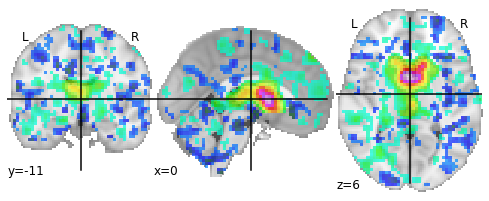

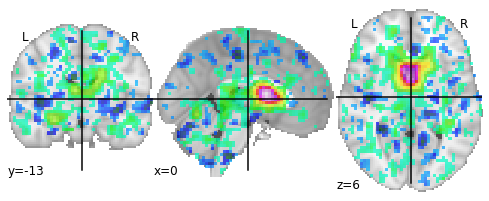

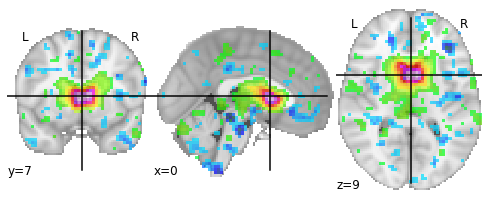

In [13]:
files = random.choices(os.listdir('../../data/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../../data/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_roi(first_rsn)
    print("-"*50)

## Data EDA...

* Analyze the data
* check for missing values.
* Analyze the correlation.

In [14]:
features.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630           NaN           NaN     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5877 non-null   int64  
 1   age           5877 non-null   float64
 2   domain1_var1  5439 non-null   float64
 3   domain1_var2  5439 non-null   float64
 4   domain2_var1  5838 non-null   float64
 5   domain2_var2  5838 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.6 KB


### Handling the missing Value...

Handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

Missing values need to be handled because they reduce the quality for any of our performance metric. It can also lead to wrong prediction or classification and can also cause a high bias for any given model being used.

In [16]:
features.fillna(features.mean(),inplace=True)

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5877 non-null   int64  
 1   age           5877 non-null   float64
 2   domain1_var1  5877 non-null   float64
 3   domain1_var2  5877 non-null   float64
 4   domain2_var1  5877 non-null   float64
 5   domain2_var2  5877 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.6 KB


In [18]:
loading.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
3  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
4  10005 -0.000398  0.006878  0.009051  0.000369  0.000336  0.010679   

      IC_10     IC_09     IC_18  ...     IC_08     IC_03     IC_21     IC_28  \
0  0.016720  0.003484  0.001797  ...  0.018246  0.023711  0.009177 -0.013929   
1  0.012277  0.002946  0.004086  ...  0.014635  0.022556  0.012004 -0.011814   
2  0.017745  0.003930 -0.008021  ...  0.019565  0.030616  0.018184 -0.010469   
3  0.013010  0.000193  0.008075  ...  0.002658  0.022266  0.005956 -0.010595   
4  0.010352  0.003637  0.004180  ...  0.009702  0.017257  0.005454 -0.008591   

      IC_11     IC_20     IC_30     IC_22     IC_29     IC_14  
0  0.030696  0.010496  0.002892 -0.023235  0.022177  0.017192  
1  0.022479  0.005739  0.002880 -0.016609  0.025543  0.014524  
2  0.029799  0.015435  0.005211 -0.028882  0.031427  0.018164  
3  0.024078 -0.000319  0.005866 -0.015182  0.024476  0.014760  
4  0.019416  0.000786  0.002692 -0.019814  0.017105  0.013316  

[5 rows x 27 columns]

In [19]:
loading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11754 entries, 0 to 11753
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      11754 non-null  int64  
 1   IC_01   11754 non-null  float64
 2   IC_07   11754 non-null  float64
 3   IC_05   11754 non-null  float64
 4   IC_16   11754 non-null  float64
 5   IC_26   11754 non-null  float64
 6   IC_06   11754 non-null  float64
 7   IC_10   11754 non-null  float64
 8   IC_09   11754 non-null  float64
 9   IC_18   11754 non-null  float64
 10  IC_04   11754 non-null  float64
 11  IC_12   11754 non-null  float64
 12  IC_24   11754 non-null  float64
 13  IC_15   11754 non-null  float64
 14  IC_13   11754 non-null  float64
 15  IC_17   11754 non-null  float64
 16  IC_02   11754 non-null  float64
 17  IC_08   11754 non-null  float64
 18  IC_03   11754 non-null  float64
 19  IC_21   11754 non-null  float64
 20  IC_28   11754 non-null  float64
 21  IC_11   11754 non-null  float64
 22

In [20]:
fnc.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.368580            0.166876            0.438148   
1  10002            0.151696           -0.024819            0.217504   
2  10003            0.343415            0.109974            0.741641   
3  10004            0.132793            0.258255            0.490769   
4  10005            0.291921            0.251254            0.416470   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.341007           -0.186251            0.049096   
1            0.418072           -0.227234           -0.064052   
2            0.578558           -0.676446           -0.436960   
3            0.342717            0.091112            0.107969   
4            0.511719           -0.362626           -0.164710   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...  \
0           0.121417          -0.174268          -0.231578  ...   
1          -0.143832          -0.118116          -0.054825  ...   
2          -0.295663          -0.377790          -0.344963  ...   
3           0.029220          -0.026237           0.094742  ...   
4          -0.289059          -0.015537          -0.087316  ...   

   CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  CBN(4)_vs_DMN(94)  \
0           -0.149279            0.552841           0.131046   
1           -0.214216           -0.039792           0.143014   
2           -0.154941            0.136850          -0.022361   
3           -0.130339            0.309540           0.141469   
4           -0.139525            0.394932           0.040443   

   CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  CBN(4)_vs_CBN(13)  \
0           0.335446            0.394867          -0.042853   
1          -0.189962            0.498373           0.444231   
2           0.137625            0.677972           0.409412   
3           0.030853            0.344394           0.214097   
4           0.428334            0.498837           0.266755   

   CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  CBN(7)_vs_CBN(4)  
0           0.124627          -0.060712           0.515964          0.290488  
1           0.592438           0.028649           0.705524          0.248327  
2           0.563892           0.438684           0.618204          0.284474  
3           0.317556           0.012435           0.665937          0.081358  
4           0.227379           0.028984           0.752343          0.087898  

[5 rows x 1379 columns]

In [21]:
fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11754 entries, 0 to 11753
Columns: 1379 entries, Id to CBN(7)_vs_CBN(4)
dtypes: float64(1378), int64(1)
memory usage: 123.7 MB


In [22]:
reveal.head()

Id
0  10012
1  10014
2  10020
3  10034
4  10059

In [23]:
reveal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      510 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [24]:
numbers.head()

ICN_number
0          69
1          53
2          98
3          99
4          45

In [25]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ICN_number  53 non-null     int64
dtypes: int64(1)
memory usage: 552.0 bytes


## Checking the correlation between features...

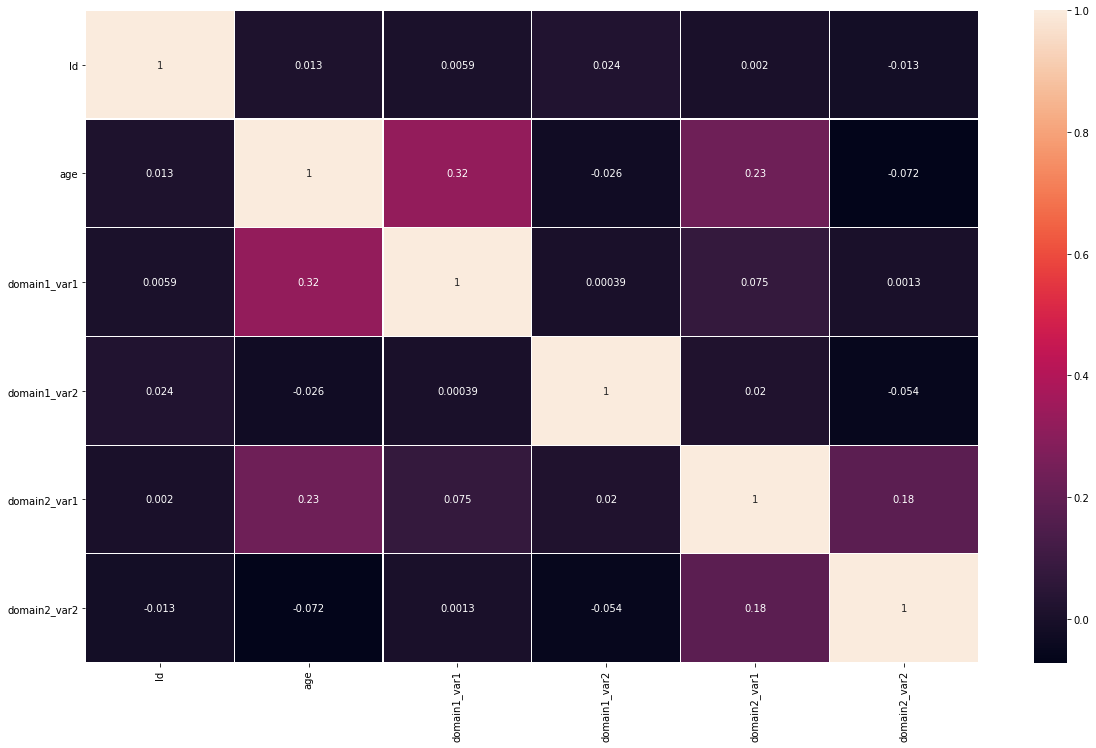

In [26]:
sns.heatmap(features.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

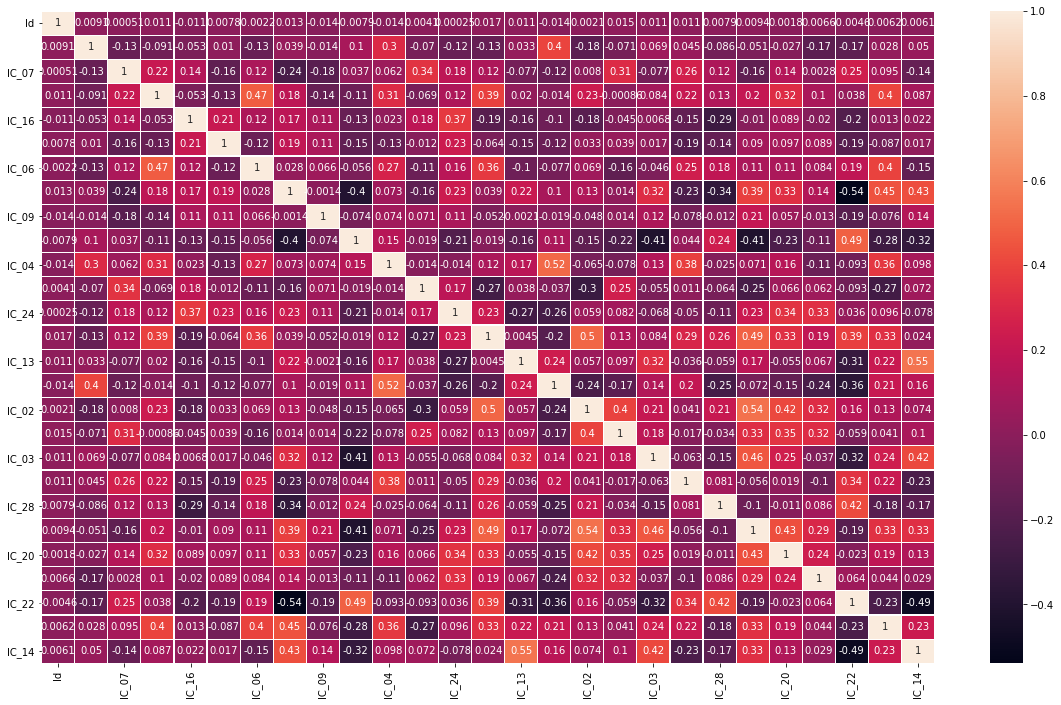

In [27]:
sns.heatmap(loading.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [28]:
#main or, target element in problem
target_col = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']

In [29]:
train_df = features.merge(loading, on='Id', how='left')
train = train_df.merge(fnc, on='Id', how='left')
train.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2  \
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998   
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361   
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641   
3  10005  66.532630     51.474692     59.244132     52.108977     69.993075   
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421   

      IC_01     IC_07     IC_05     IC_16  ...  CBN(13)_vs_DMN(94)  \
0  0.006070  0.014466  0.004136  0.000658  ...           -0.149279   
1  0.009087  0.009291  0.007049 -0.002076  ...           -0.214216   
2  0.004675  0.000957  0.006154 -0.000429  ...           -0.130339   
3 -0.000398  0.006878  0.009051  0.000369  ...           -0.139525   
4  0.005192  0.010585  0.012160 -0.000920  ...           -0.150218   

   CBN(18)_vs_DMN(94)  CBN(4)_vs_DMN(94)  CBN(7)_vs_DMN(94)  \
0            0.552841           0.131046           0.335446   
1           -0.039792           0.143014          -0.189962   
2            0.309540           0.141469           0.030853   
3            0.394932           0.040443           0.428334   
4            0.408926           0.072004           0.157582   

   CBN(18)_vs_CBN(13)  CBN(4)_vs_CBN(13)  CBN(7)_vs_CBN(13)  \
0            0.394867          -0.042853           0.124627   
1            0.498373           0.444231           0.592438   
2            0.344394           0.214097           0.317556   
3            0.498837           0.266755           0.227379   
4            0.532046           0.355448           0.462675   

   CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  CBN(7)_vs_CBN(4)  
0          -0.060712           0.515964          0.290488  
1           0.028649           0.705524          0.248327  
2           0.012435           0.665937          0.081358  
3           0.028984           0.752343          0.087898  
4           0.161005           0.703679          0.293607  

[5 rows x 1410 columns]

## Prepare the Train dataset...

In [30]:
X = train.drop(target_col, axis=1)
X.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
3  10005 -0.000398  0.006878  0.009051  0.000369  0.000336  0.010679   
4  10007  0.005192  0.010585  0.012160 -0.000920 -0.002255  0.011416   

      IC_10     IC_09     IC_18  ...  CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  \
0  0.016720  0.003484  0.001797  ...           -0.149279            0.552841   
1  0.012277  0.002946  0.004086  ...           -0.214216           -0.039792   
2  0.013010  0.000193  0.008075  ...           -0.130339            0.309540   
3  0.010352  0.003637  0.004180  ...           -0.139525            0.394932   
4  0.013838  0.001929  0.003051  ...           -0.150218            0.408926   

   CBN(4)_vs_DMN(94)  CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  \
0           0.131046           0.335446            0.394867   
1           0.143014          -0.189962            0.498373   
2           0.141469           0.030853            0.344394   
3           0.040443           0.428334            0.498837   
4           0.072004           0.157582            0.532046   

   CBN(4)_vs_CBN(13)  CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  \
0          -0.042853           0.124627          -0.060712           0.515964   
1           0.444231           0.592438           0.028649           0.705524   
2           0.214097           0.317556           0.012435           0.665937   
3           0.266755           0.227379           0.028984           0.752343   
4           0.355448           0.462675           0.161005           0.703679   

   CBN(7)_vs_CBN(4)  
0          0.290488  
1          0.248327  
2          0.081358  
3          0.087898  
4          0.293607  

[5 rows x 1405 columns]

In [31]:

y = features
y.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630     51.474692     59.244132     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [32]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5877 non-null   int64  
 1   age           5877 non-null   float64
 2   domain1_var1  5877 non-null   float64
 3   domain1_var2  5877 non-null   float64
 4   domain2_var1  5877 non-null   float64
 5   domain2_var2  5877 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.6 KB


## Preparaing the test data...

In [33]:
submission['ID_num'] = submission['Id'].apply(lambda x: int(x.split('_')[0]))
test = pd.DataFrame({'Id': submission['ID_num'].unique()})
del submission['ID_num'];
test.head()

Id
0  10003
1  10006
2  10010
3  10011
4  10012

In [34]:
test = test.merge(loading, on='Id', how='left')
test = test.merge(fnc, on='Id', how='left')
test.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
1  10006  0.000334  0.005311  0.010053  0.006920 -0.000065  0.015310   
2  10010  0.007103  0.006144  0.009770 -0.002884 -0.001346  0.015651   
3  10011  0.004362  0.010240  0.010167  0.004492 -0.001623  0.017381   
4  10012 -0.007521 -0.003918  0.008434 -0.001145  0.002017  0.015065   

      IC_10     IC_09     IC_18  ...  CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  \
0  0.017745  0.003930 -0.008021  ...           -0.154941            0.136850   
1  0.016543  0.004794  0.003982  ...           -0.053606            0.240957   
2  0.011613 -0.003291  0.013423  ...           -0.244332            0.272077   
3  0.014680  0.007453  0.008786  ...           -0.099726            0.557121   
4  0.019616  0.004140 -0.003744  ...           -0.025230            0.203298   

   CBN(4)_vs_DMN(94)  CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  \
0          -0.022361           0.137625            0.677972   
1           0.270419           0.367692            0.354501   
2           0.193523           0.192254            0.563982   
3           0.042626           0.179456            0.416546   
4           0.173427           0.046047            0.561599   

   CBN(4)_vs_CBN(13)  CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  \
0           0.409412           0.563892           0.438684           0.618204   
1           0.486364           0.416908           0.285274           0.693490   
2           0.124482           0.488926           0.083368           0.774299   
3           0.445402           0.436909           0.165182           0.591561   
4           0.418268           0.609517           0.218285           0.790285   

   CBN(7)_vs_CBN(4)  
0          0.284474  
1          0.448526  
2          0.129327  
3          0.306678  
4          0.301010  

[5 rows x 1405 columns]

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5877 entries, 0 to 5876
Columns: 1405 entries, Id to CBN(7)_vs_CBN(4)
dtypes: float64(1404), int64(1)
memory usage: 63.0 MB


In [36]:
def weighted_NAE(yTrue,yPred):
    weights = K.constant([.3, .175, .175, .175, .175], dtype = tf.float32)
    return K.sum(weights * K.sum(K.abs(yTrue - yPred)) / K.sum(yPred))

## Creating the Models...

In [37]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold,cross_val_score
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(1404,input_dim=1404,kernel_initializer='normal',activation='relu'))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dense(5,kernel_initializer='normal'))

#model.compile(loss='mean_absolute_error',optimizer='adam', metrics = ['accuracy'])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy', weighted_NAE])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1404)              1972620   
_________________________________________________________________
dense_1 (Dense)              (None, 702)               986310    
_________________________________________________________________
dropout (Dropout)            (None, 702)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 702)               493506    
_________________________________________________________________
dropout_1 (Dropout)          (None, 702)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 702)               493506    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 3

In [38]:
def lrfn(epoch):
    LR_START = 0.00001
    LR_MAX = 0.00005 * 8
    LR_MIN = 0.00001
    LR_RAMPUP_EPOCHS = 5
    LR_SUSTAIN_EPOCHS = 0
    LR_EXP_DECAY = .8
    
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

In [39]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)

history=model.fit(X.iloc[:,1:],y.iloc[:,1:],epochs=25,batch_size=32,validation_split=0.25,callbacks=[lr_schedule],verbose=2)

Train on 4407 samples, validate on 1470 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/25
4407/4407 - 1s - loss: 2281.0492 - accuracy: 0.3249 - weighted_NAE: 19.7703 - val_loss: 1400.1726 - val_accuracy: 0.4639 - val_weighted_NAE: 2.1353

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/25
4407/4407 - 0s - loss: 246.5098 - accuracy: 0.3687 - weighted_NAE: 0.2703 - val_loss: 171.8173 - val_accuracy: 0.4639 - val_weighted_NAE: 0.2255

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/25
4407/4407 - 0s - loss: 172.7079 - accuracy: 0.4025 - weighted_NAE: 0.2037 - val_loss: 173.1099 - val_accuracy: 0.4639 - val_weighted_NAE: 0.2306

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/25
4407/4407 - 0s - loss: 159.1535 - accuracy: 0.4184 - weighted_NAE: 0.1948 - val_loss: 156.7021 - val_accuracy: 0.4639 - val_weighted_NAE: 0.2113

Epoch 00005: LearningRateScheduler reduc

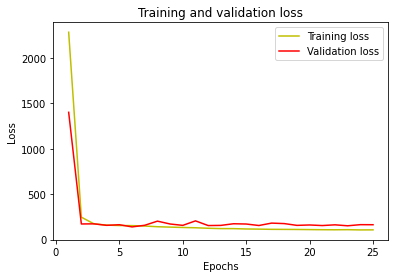

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

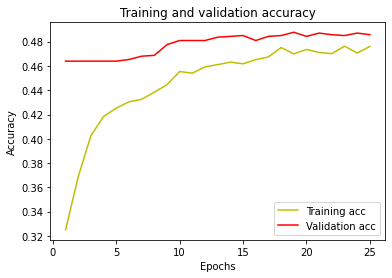

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
prediction = model.predict(test.iloc[:,1:])
prediction = pd.DataFrame(prediction)
prediction.columns = y.iloc[:,1:].columns
prediction.head(10)

age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  55.365402     46.847820     47.687416     42.974854     43.843033
1  58.296970     49.514294     50.432777     44.516487     43.292580
2  29.582094     42.893845     55.572186     39.502563     48.464626
3  56.066151     49.843700     53.122955     46.083443     45.011955
4  49.509403     48.945099     51.883659     42.596283     48.848076
5  47.580605     48.977306     55.975113     45.886726     51.214954
6  36.508701     43.505737     52.858265     40.078217     45.607220
7  40.240192     45.454121     52.112190     40.926327     47.639526
8  41.744541     46.095856     54.852528     43.260494     46.416637
9  54.848454     45.712257     48.499306     42.624199     39.305149

In [43]:
pred = pd.DataFrame()

for target in target_col:
    value = pd.DataFrame()
    value['Id'] = [f'{c}_{target}' for c in test['Id'].values]
    value['Predicted'] = prediction[target]
    pred = pd.concat([pred, value])

pred.head()

Id  Predicted
0  10003_age  55.365402
1  10006_age  58.296970
2  10010_age  29.582094
3  10011_age  56.066151
4  10012_age  49.509403

## Let Create the Submission...

In [44]:
submission

Id  Predicted
0               10003_age       50.0
1      10003_domain1_var1       50.0
2      10003_domain1_var2       50.0
3      10003_domain2_var1       50.0
4      10003_domain2_var2       50.0
...                   ...        ...
29380           21753_age       50.0
29381  21753_domain1_var1       50.0
29382  21753_domain1_var2       50.0
29383  21753_domain2_var1       50.0
29384  21753_domain2_var2       50.0

[29385 rows x 2 columns]

In [45]:
submission = pd.merge(submission, pred, on = 'Id')
submission = submission[['Id', 'Predicted_y']]
submission.columns = ['Id', 'Predicted']
submission.to_csv('submission.csv', index=False)
submission.head()


Id  Predicted
0           10003_age  55.365402
1  10003_domain1_var1  46.847820
2  10003_domain1_var2  47.687416
3  10003_domain2_var1  42.974854
4  10003_domain2_var2  43.843033

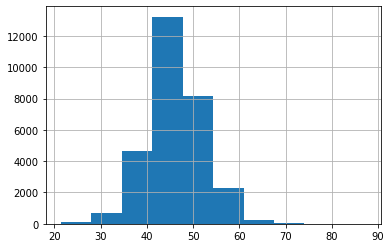

In [46]:
submission['Predicted'].hist()